In [11]:
import os
import pandas as pd
os.chdir('D:/Pesquisa/Mestrado/PRIMEIRO_CAPITULO_DIFERENCIADO/Artigo_Ecological_Modeling')
os.listdir()

['2aVersaoArtigo.docx',
 'Acompanhamento_Escrever.txt',
 'amotacoes artigos.docx',
 'AnovaCompleta+HSD.txt',
 'ArtigosProblemasRegistros',
 'avaliação geral modelos.png',
 'Estatisticas por modelo.png',
 'FrameMapa.mxd',
 'framework.pptx',
 'imagens_matsup',
 'imagens_modelos.docx',
 'Introducao_Artigo.docx',
 'Nicho ecológico de hutchinson.docx',
 'PCAFinal.png',
 'PCA_Curvas.docx',
 'PontosAleatorios',
 'PredicoesParaBoyce',
 'ResponseCurveAll.png',
 'ResponseCurveFullSet.png',
 'ResponseCurvePdRd.png',
 'ResponseCurveRdPd.png',
 'Supplement Material 1.docx',
 'ValoresAdeqMAXTSS.txt',
 'ValoresAUC.xlsx',
 'ValoresEspecificidade.xlsx',
 'ValoresSensibilidade.xlsx',
 'ValoresTSS.xlsx',
 'ValoresVarImport.xlsx',
 'VariableImportance.png']

In [27]:
#Importando Dataframes para o Python
Sensibilidade_TipoII = pd.read_excel('ValoresSensibilidade.xlsx',usecols ='A:D')


TSS = pd.read_excel('ValoresTSS.xlsx',usecols='A:C')

AUC = pd.read_excel('ValoresAUC.xlsx',usecols = 'A:C')


In [28]:
#Selecionando as colunas que queremos de cada dataframe:
Sensibilidade_TipoII2=Sensibilidade_TipoII[['Sensibilidade','Erro TipoII','Data_Partitioning']]
TSS2 = TSS[['TSS','Data_Partitioning']]
AUC2 = AUC[['AUC','Modelo']]


In [29]:
#Padronizando nossos DFs
TSS2 = TSS2.sort_values('Data_Partitioning',ignore_index = True)

Sensibilidade_TipoII2 = Sensibilidade_TipoII2.sort_values('Data_Partitioning',ignore_index = True)

AUC2.rename(columns = {'Modelo':'Data_Partitioning'}, inplace = True)
AUC2 = AUC2.sort_values('Data_Partitioning',ignore_index = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [30]:
#Criando o DF concatenado
pd_concated = pd.concat([Sensibilidade_TipoII2,TSS2,AUC2],axis = 1)
pd_concated

,Sensibilidade,Erro TipoII,Data_Partitioning,TSS,Data_Partitioning,AUC,Data_Partitioning
0,0.907,0.093,FullSet,0.818,FullSet,0.951,FullSet
1,0.962,0.038,FullSet,0.835,FullSet,0.927,FullSet
2,1.000,0.000,FullSet,0.817,FullSet,0.958,FullSet
3,0.953,0.047,FullSet,0.793,FullSet,0.927,FullSet
4,0.979,0.021,FullSet,0.693,FullSet,0.876,FullSet
...,...,...,...,...,...,...,...
745,0.982,0.018,RdPd,0.771,RdPd,0.827,RdPd
746,0.982,0.018,RdPd,0.785,RdPd,0.840,RdPd
747,0.982,0.018,RdPd,0.785,RdPd,0.852,RdPd
748,0.982,0.018,RdPd,0.742,RdPd,0.847,RdPd


In [31]:
#Embelezando este DF
pd_concated=pd_concated[['Sensibilidade','Erro TipoII','TSS','AUC','Data_Partitioning']]
pd_concated = pd_concated.iloc[:,0:5]
pd_concated


,Sensibilidade,Erro TipoII,TSS,AUC,Data_Partitioning
0,0.907,0.093,0.818,0.951,FullSet
1,0.962,0.038,0.835,0.927,FullSet
2,1.000,0.000,0.817,0.958,FullSet
3,0.953,0.047,0.793,0.927,FullSet
4,0.979,0.021,0.693,0.876,FullSet
...,...,...,...,...,...
745,0.982,0.018,0.771,0.827,RdPd
746,0.982,0.018,0.785,0.840,RdPd
747,0.982,0.018,0.785,0.852,RdPd
748,0.982,0.018,0.742,0.847,RdPd


In [32]:
novo_nome = {'FullSet':'FullSet','RdPd':"RdUd",'PdRd':"UdRd"}
pd_concated['Data_Partitioning'] = pd_concated['Data_Partitioning'].map(novo_nome)
pd_concated = pd_concated.sort_values('Data_Partitioning',ignore_index = True)
pd_concated

,Sensibilidade,Erro TipoII,TSS,AUC,Data_Partitioning
0,0.907,0.093,0.818,0.951,FullSet
1,0.982,0.018,0.777,0.912,FullSet
2,1.000,0.000,0.857,0.890,FullSet
3,0.983,0.017,-0.014,0.944,FullSet
4,1.000,0.000,0.614,0.941,FullSet
...,...,...,...,...,...
745,0.965,0.035,0.778,0.902,UdRd
746,0.814,0.186,0.672,0.785,UdRd
747,0.942,0.058,0.524,0.856,UdRd
748,0.930,0.070,0.366,0.900,UdRd


[Text(0, 0, 'FullSet'), Text(0, 1, 'UdRd'), Text(0, 2, 'RdUd')]

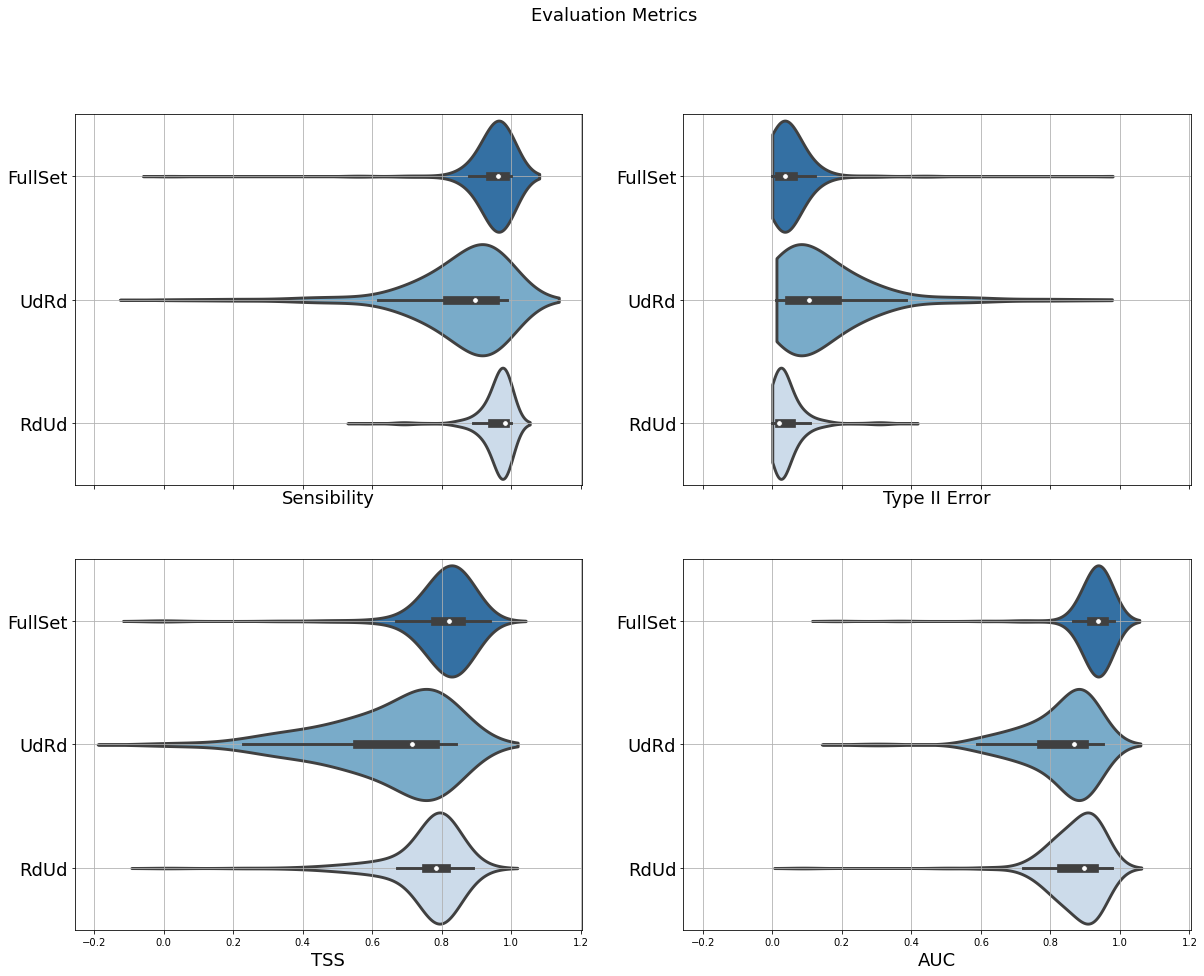

In [33]:

#Criando nosso Violin Plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
order = ['FullSet','UdRd','RdUd']
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,15))


fig.suptitle('Evaluation Metrics',fontsize = 18)
sns.violinplot(ax=axes[0,0],x="Sensibilidade", y="Data_Partitioning", data=pd_concated,order = order,palette="Blues_r",ci=None,split = True,inner = 'box',
              bw = 0.5,scale = 'width',gridsize = 750,width = 0.9,linewidth=2.9)




sns.violinplot(ax=axes[0,1],x="Erro TipoII", y="Data_Partitioning", data=pd_concated,order = order,palette="Blues_r",ci=None,split = True,inner = 'box',
              bw = 0.5,cut = 0,scale = 'width',gridsize = 750,width = 0.9,linewidth=2.9)
sns.violinplot(ax=axes[1,0],x="TSS", y="Data_Partitioning", data=pd_concated,order = order,palette="Blues_r",ci=None,split = True,inner = 'box',
              bw = 0.5,scale = 'width',gridsize = 750,width = 0.9,linewidth=2.9)

sns.violinplot(ax=axes[1,1],x="AUC", y="Data_Partitioning", data=pd_concated,order = order,palette="Blues_r",ci=None,split = True,inner = 'box',
              bw = 0.5,scale = 'width',gridsize = 750,width = 0.9,linewidth=2.9)







axes[0,0].set_xlabel('Sensibility',fontsize = 18)
axes[0,0].set_ylabel(None)
axes[0,0].grid(True)
axes[0,0].set_facecolor('white')
axes[0,0].set_yticklabels(['FullSet','UdRd','RdUd'],fontsize = 18)




axes[0,1].set_xlabel('Type II Error',fontsize = 18)
axes[0,1].set_ylabel(None)
axes[0,1].grid(True)
axes[0,1].set_facecolor('white')
axes[0,1].set_yticklabels(['FullSet','UdRd','RdUd'],fontsize = 18)


axes[1,0].set_xlabel('TSS',fontsize = 18)
axes[1,0].set_ylabel(None)
axes[1,0].grid(True)
axes[1,0].set_facecolor('white')
axes[1,0].set_yticklabels(['FullSet','UdRd','RdUd'],fontsize = 18)



axes[1,1].set_xlabel('AUC',fontsize = 18)
axes[1,1].set_ylabel(None)
axes[1,1].grid(True)
axes[1,1].set_facecolor('white')
axes[1,1].set_yticklabels(['FullSet','UdRd','RdUd'],fontsize = 18)



In [9]:
pd_concated.groupby(by = 'Data_Partitioning').median().round(2)

,Sensibilidade,Erro TipoII,TSS,AUC
Data_Partitioning,,,,
FullSet,0.96,0.04,0.82,0.94
PdRd,0.90,0.10,0.72,0.87
RdPd,0.98,0.02,0.78,0.90
